Mikhael Adiputra 2301957572 LD01, QUIZ 2 LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.optimize as opt
%matplotlib inline

In [2]:
dataset = pd.read_csv('credit-approval_csv.csv', sep = ",")
dataset.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+,Approved
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+,Approved
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+,Approved
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+,Approved
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+,Approved
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+,Approved


In [3]:
dataset = dataset.drop(columns = ["Approved"])

In [4]:
dataset.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,Approved
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,Approved
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,Approved
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,Approved
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,Approved
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,Approved
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,Approved
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,Approved
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,Approved
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,Approved


We removed Approved column, since it's redundant with Approved Status Column

# Data Cleaning

In [5]:
# creating the dataset
def visualize_null():
    column_name = list(dataset.keys())
    values      = list(dataset.isnull().sum())

    fig         = plt.figure(figsize = (20, 5))

    # creating the bar plot
    plt.bar(column_name, values, color ='maroon', width = 0.4)

    plt.ylabel("Missing Values")
    plt.title("Column Missing Values")
    plt.show()

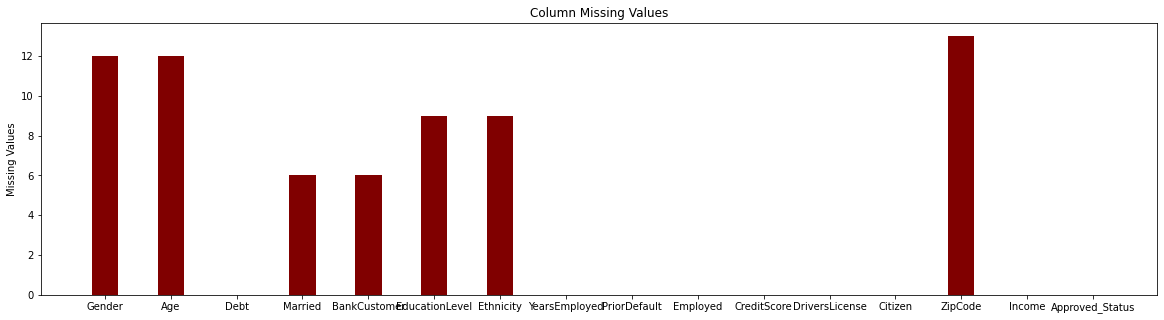

In [6]:
visualize_null()

Since the are a few columns with missing values, we need to replace it with imputation, how we fill the missing value depends on the datatype for each column

if the datatype is string then, we change it with mode imputation if else, we change it with mean imputation

# Imputation

In [7]:
def input_missing_values(dataset):
    for index in range(0,len(dataset.keys())):
        if dataset[dataset.keys()[index]].dtype == object:
            mode = dataset[dataset.keys()[index]].mode()[0]
            dataset[dataset.keys()[index]].fillna(mode, inplace=True)
        else:
            mean = dataset[dataset.keys()[index]].mean()
            dataset[dataset.keys()[index]] = dataset[dataset.keys()[index]].astype(float)
            dataset[dataset.keys()[index]].fillna(mean, inplace=True)

In [8]:
input_missing_values(dataset)

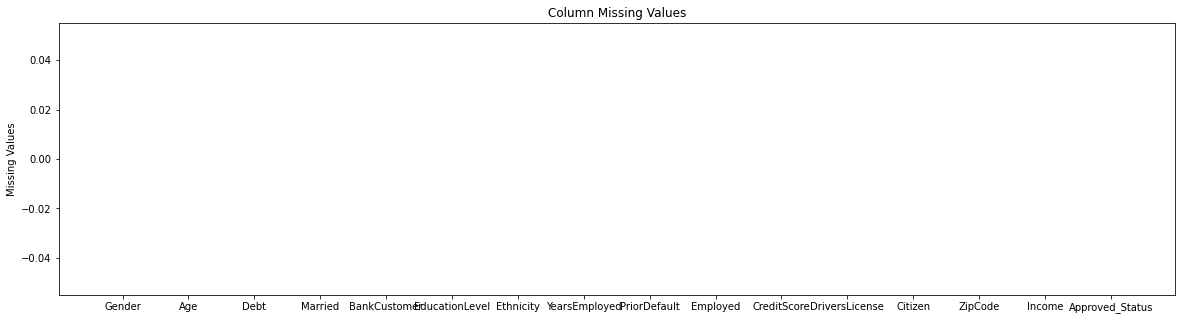

In [9]:
visualize_null()

# Label Encoding

In [10]:
dataset.dtypes

Gender              object
Age                float64
Debt               float64
Married             object
BankCustomer        object
EducationLevel      object
Ethnicity           object
YearsEmployed      float64
PriorDefault        object
Employed            object
CreditScore        float64
DriversLicense      object
Citizen             object
ZipCode            float64
Income             float64
Approved_Status     object
dtype: object

Since there are some column are in object dtype, we need to convert it into numerical value with Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

for index in dataset:
    if dataset[index].dtype == object:
        label_encoder = LabelEncoder()
        dataset[index] = label_encoder.fit_transform(dataset[index])

In [12]:
dataset.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved_Status
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,1.233333,0.475362,5.698551,5.098551,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,184.014771,1017.385507,0.555072
std,0.460464,11.853273,4.978163,0.430063,0.850238,4.285748,2.510731,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,1.000000,0.000000,5.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,160.000000,5.000000,1.000000
75%,1.000000,37.707500,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,2000.000000,100000.000000,1.000000


# Handling Outlier and Scaling

Based on the describe method, we knew that some of the numeric values column, have a very wide range and outlier. So we have to take care of that

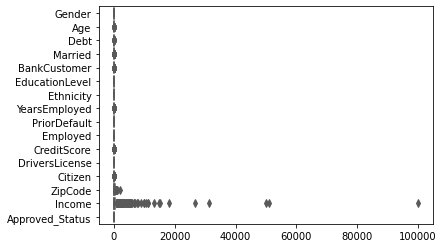

In [13]:
import seaborn as sns
outliers = sns.boxplot(data=dataset, orient="h", palette="Set2")

In [14]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Gender               1.0000
Age                 15.0375
Debt                 6.2075
Married              0.0000
BankCustomer         0.0000
EducationLevel       9.0000
Ethnicity            4.0000
YearsEmployed        2.4600
PriorDefault         1.0000
Employed             1.0000
CreditScore          3.0000
DriversLicense       1.0000
Citizen              0.0000
ZipCode            192.0000
Income             395.5000
Approved_Status      1.0000
dtype: float64


In [15]:
# Remove Outlier from the dataset
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

(305, 16)

In [16]:
dataset.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved_Status
count,305.000000,305.000000,305.000000,305.0,305.0,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0,305.000000,305.000000,305.000000
mean,0.655738,28.950283,4.081689,1.0,0.0,5.826230,5.281967,1.249033,0.452459,0.396721,1.068852,0.445902,0.0,182.895130,122.636066,0.616393
std,0.475908,9.720989,3.974938,0.0,0.0,4.330807,2.447979,1.444054,0.498553,0.490021,1.761759,0.497882,0.0,133.552088,224.865739,0.487063
min,0.000000,15.750000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,21.750000,0.960000,1.0,0.0,1.000000,3.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.0,96.000000,0.000000,0.000000
50%,1.000000,26.250000,2.500000,1.0,0.0,6.000000,7.000000,0.665000,0.000000,0.000000,0.000000,0.000000,0.0,160.000000,2.000000,1.000000
75%,1.000000,34.250000,6.000000,1.0,0.0,10.000000,7.000000,1.750000,1.000000,1.000000,2.000000,1.000000,0.0,272.000000,146.000000,1.000000
max,1.000000,59.670000,15.500000,1.0,0.0,13.000000,7.000000,6.040000,1.000000,1.000000,7.000000,1.000000,0.0,560.000000,960.000000,1.000000


# Min Max Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler

keys = dataset.keys()

scaler = MinMaxScaler()
scaler.fit(dataset)
dataset = scaler.transform(dataset)
dataset = pd.DataFrame(dataset, columns = keys)

In [18]:
dataset.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved_Status
count,305.000000,305.000000,305.000000,305.0,305.0,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0,305.000000,305.000000,305.000000
mean,0.655738,0.300553,0.263335,0.0,0.0,0.448172,0.754567,0.206794,0.452459,0.396721,0.152693,0.445902,0.0,0.326598,0.127746,0.616393
std,0.475908,0.221334,0.256448,0.0,0.0,0.333139,0.349711,0.239082,0.498553,0.490021,0.251680,0.497882,0.0,0.238486,0.234235,0.487063
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.136612,0.061935,0.0,0.0,0.076923,0.428571,0.027318,0.000000,0.000000,0.000000,0.000000,0.0,0.171429,0.000000,0.000000
50%,1.000000,0.239071,0.161290,0.0,0.0,0.461538,1.000000,0.110099,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,0.002083,1.000000
75%,1.000000,0.421220,0.387097,0.0,0.0,0.769231,1.000000,0.289735,1.000000,1.000000,0.285714,1.000000,0.0,0.485714,0.152083,1.000000
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


# Data Preparation

In [19]:
train_dataset = dataset.sample(frac=0.8,random_state=1) #random state is a seed value
test_dataset  = dataset.drop(train_dataset.index)

train_x = train_dataset.loc[:,train_dataset.columns != "Approved_Status"] 
test_x = test_dataset.loc[:,test_dataset.columns != "Approved_Status"]

train_y = train_dataset['Approved_Status'].values
test_y = test_dataset['Approved_Status'].values

In [20]:
train_x.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
count,244.000000,244.000000,244.000000,244.0,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.0,244.000000,244.000000
mean,0.643443,0.300520,0.263913,0.0,0.0,0.441047,0.752342,0.201987,0.442623,0.405738,0.150468,0.438525,0.0,0.325205,0.127139
std,0.479967,0.221430,0.254104,0.0,0.0,0.332554,0.351804,0.237106,0.497718,0.492044,0.245956,0.497226,0.0,0.232581,0.233400
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.130920,0.064516,0.0,0.0,0.076923,0.428571,0.027318,0.000000,0.000000,0.000000,0.000000,0.0,0.175446,0.000000
50%,1.000000,0.248634,0.173387,0.0,0.0,0.461538,1.000000,0.110099,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,0.002083
75%,1.000000,0.424066,0.390484,0.0,0.0,0.769231,1.000000,0.289735,1.000000,1.000000,0.178571,1.000000,0.0,0.473661,0.156250
max,1.000000,1.000000,0.940968,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [21]:
train_y

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1.

# Logistic Regression Algorithm

In [22]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()

regressor.fit(train_x,train_y)

y_predicted = regressor.predict(test_x)
y_predicted

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, y_predicted)
print(accuracy)

0.8524590163934426


In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, y_predicted)

array([[23,  4],
       [ 5, 29]], dtype=int64)